## week1授業前課題1 Pythonを使ってみよう
### テーマ：紙を折る
**【問題1】べき乗の算術演算子を使用して作成**

In [1]:
"""
紙を43回折った時の厚さを計算するコード
"""
THICKNESS = 0.00008
folded43_thickness = THICKNESS * 2**43
print("厚さ：{}メートル".format(folded43_thickness))

厚さ：703687441.77664メートル


**【問題2】単位の変換**

In [2]:
#メートルを○○万キロメートルに変換して、小数点以下2桁で表示
print("厚さ：{: .2f}万キロメートル".format(folded43_thickness / 10000000))

厚さ： 70.37万キロメートル


月までの距離は38.44万キロメートルなので、43回折った紙は月に届く。

**【問題3】for文を使用して作成**

In [3]:
new_thickness = 0.00008
for i in range(43):
    new_thickness *= 2
print("厚さ： {}メートル".format(new_thickness))

厚さ： 703687441.77664メートル


**【問題4】計算時間の比較**

①べき乗の算術演算子を使用した場合

In [4]:
import time
start = time.time()

folded43_thickness = THICKNESS * 2**43

elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 3.504753112792969e-05[s]


②for文を使用した場合

In [5]:
import time
start = time.time()

for i in range(43):
    new_thickness *= 2

elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 4.1961669921875e-05[s]


①,②の結果より、  
べき乗の算術演算子を使用した方が、for文の場合よりも計算時間は短い。  
べき乗の算術演算子を使った書き方の方が望ましい。

《発展：繰り返し回数を増やす》  
1000乗の場合について調べてみる。

①べき乗の算術演算子を使用した場合

In [6]:
import time
start = time.time()

folded1000_thickness = THICKNESS * 2**1000

elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 3.6716461181640625e-05[s]


②for文を使用した場合

In [7]:
import time
start = time.time()

for i in range(1000):
    new_thickness *= 2

elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 0.00011897087097167969[s]


43乗の場合の時間差は、約1.5e-05  
1000乗の場合の時間差は、約9e-05  
微々たる差のように思えるが、積もり積もれば大きな時間差になる。  
視認性の観点からもべき乗の方が優れている。

《発展：マジックコマンドを使う》

In [8]:
%%timeit #マジックコマンド
folded43_thickness = THICKNESS * 2**43

49.8 ns ± 1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


マジックコマンドを使わない場合（3.504753112792969e-05[s]）と比較すると  
大きな差がある。使い方に間違いがある可能性が高い。

**【問題5】リストへの保存**

In [9]:
new_thickness = 0.00008
value_list = []
value_list.append(new_thickness)

for i in range(43):
    new_thickness *= 2
    value_list.append(new_thickness)

#値の個数確認
print(len(value_list))

44


value_listというリストに過程の値を記録し、値の個数に間違いが無い事を確認できた。

**【問題6】折れ線グラフの表示**

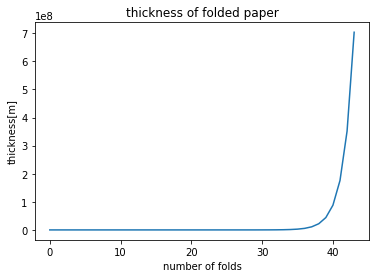

In [10]:
"""
グラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt

%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(value_list) 
plt.show()

指数関数のグラフになっており、折る回数が35を超えた辺りから急激に厚みが増している。 
<br>
<br>
y軸の指数表記を「10<sup>8</sup>」のようにしたかったが、なかなか手間がかかりそうなので保留。  
Matplotibでグラフをつくるには、  
①オブジェクト指向インターフェース（グラフの細かな設定をしやすいがやや複雑）  
②Pyplotインターフェース（操作の対象等を明示的に指定しなくても自動で設定を行うため、気軽にグラフを描ける）  
という2つの方法があるようだが、今回は②を使用している。

**【問題7】グラフのカスタマイズ**  
カスタマイズしたグラフを3つ作成

①グラフの線を点線スタイルに変更 & 線を太く & グリッドの表示

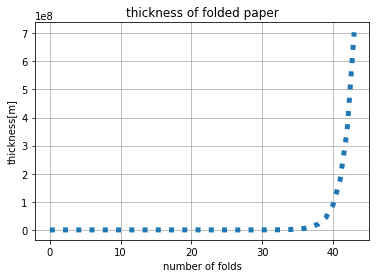

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(value_list, linewidth=5, linestyle=":") 
plt.grid(True)#グリッドの表示
plt.show()

②グラフの線を黒色に変更 & ポイントマーカーを追加

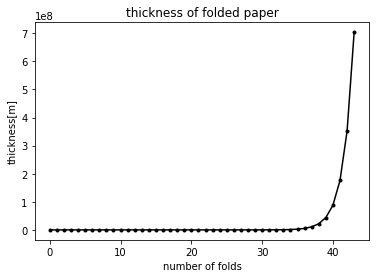

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(value_list, color="black", marker='.') 
plt.show()

③matplotlib.pyplot.tick_paramsを使用し、目盛りの色を青に & 位置を内側に & 長さを長く & 幅を太く 

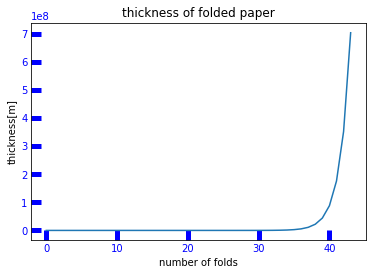

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.tick_params(direction='in', length=10, width=5, colors="blue")
plt.plot(value_list) 
plt.show()